Необходимо создать, обучить нейронную сеть с точностью не менее 50% и упаковать её в архив для загрузки на демо-панель:
* создать нейронную сеть для распознавания классов в cifar100
* сохраните веса
* подготовить запуск модели "из коробки"
* подготовить архив с готовой нейронной сетью для загрузки в демо-панель


In [1]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras.layers import MaxPooling2D, Flatten
from tensorflow.keras import Sequential

from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.optimizers import Adam

import pickle
from pylab import rcParams

import numpy as np
import pandas as pd  

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# cifar 100 upload
# label mode can be changed to 'coarse' and in that case we have 20 superclasses
# instead of 100 subclassess in the default mode

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine') 

fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed',
               'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge',
               'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar',
               'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach',
               'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin',
               'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster',
               'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower',
               'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree',
               'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree',
               'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck',
               'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
               'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
               'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail',
               'snake', 'spider', 'squirrel', 'streetcar', 'sunflower',
               'sweet_pepper', 'table', 'tank', 'telephone', 'television',
               'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
               'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

169017344/169001437 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


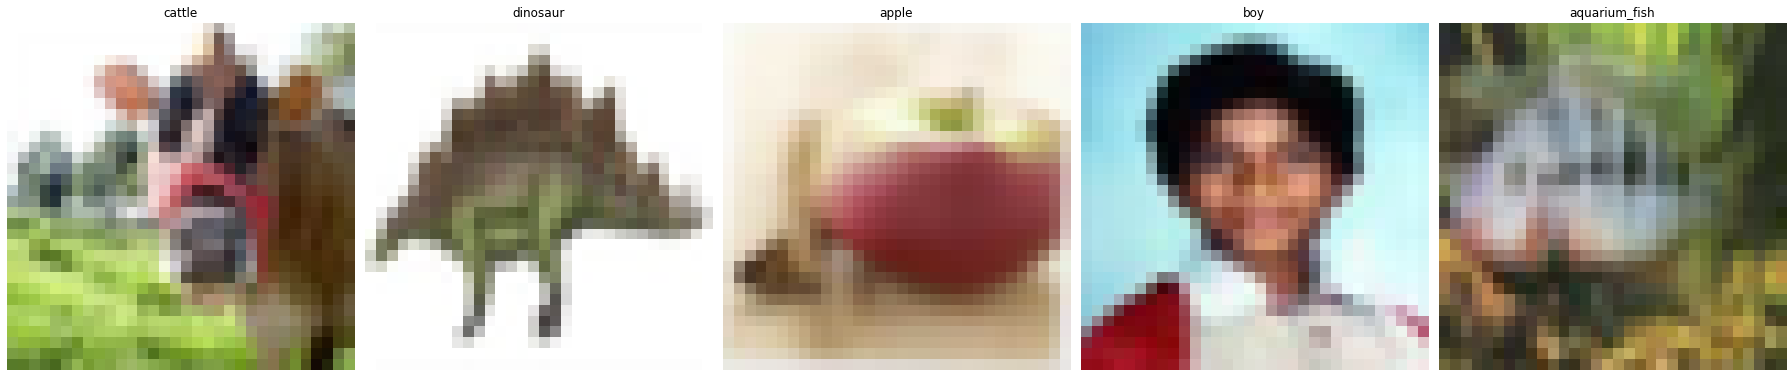

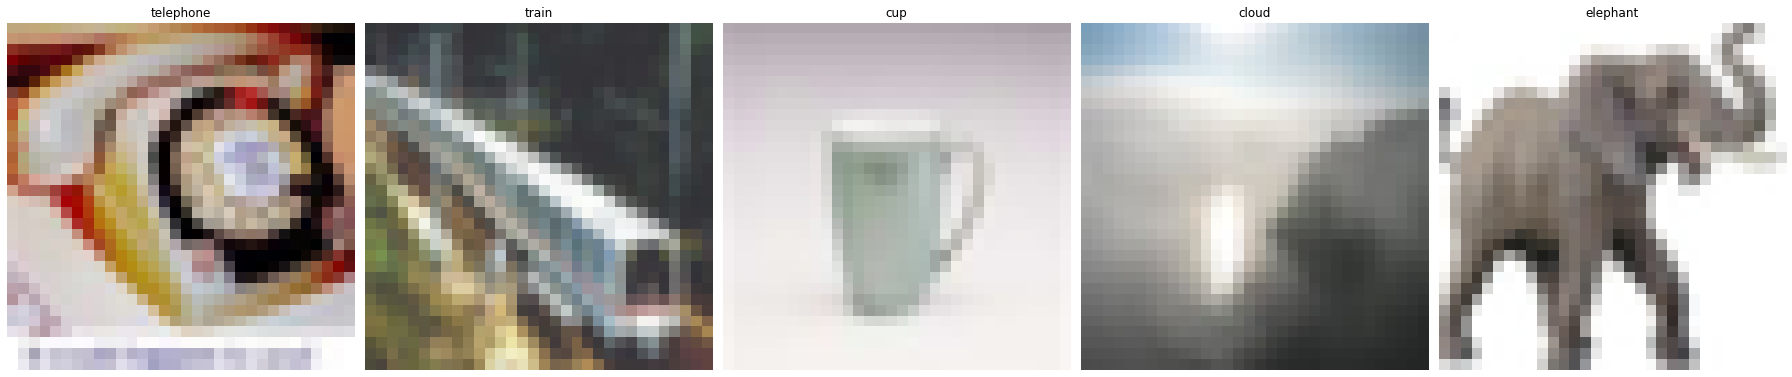

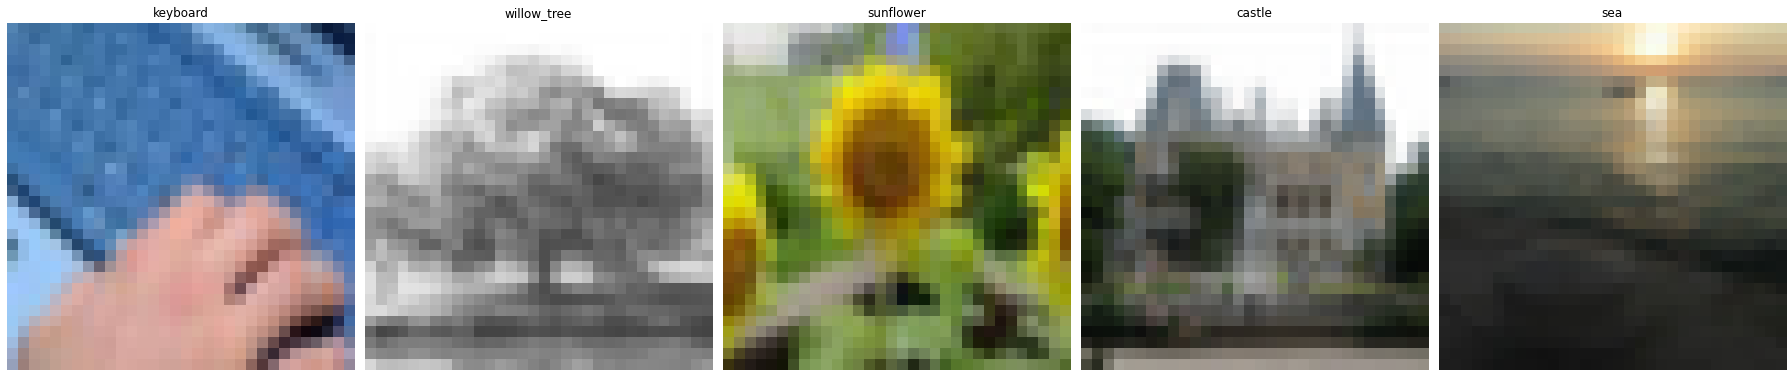

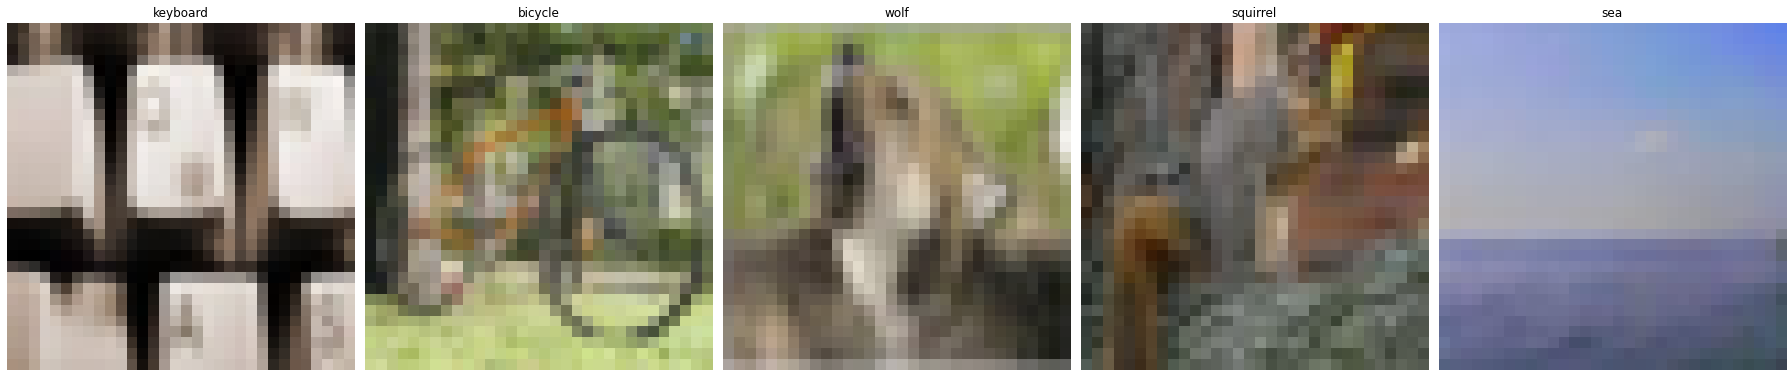

In [4]:
def print_images(x, y, 
                 figsize=(25, 8),     #row's size
                 image2print=20,      
                 columns=5):          #columns in one row
    for idx in range(image2print):
        ix = idx % columns
        if ix == 0:
            fig, ax = plt.subplots(1, columns, figsize=figsize)
    
        labels_name = fine_labels[y[idx][0]]
        ax[ix].set_title(labels_name)
        ax[ix].imshow(x[idx])  
        ax[ix].axis('off')
        plt.tight_layout()

    plt.show()

print_images(x_train, y_train)

In [5]:
#data normalization
x_train = x_train / 255.
x_test = x_test / 255.

#number of classes in the dataset
n_classes = 100

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [8]:
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:],
                 activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

# Компиляция модели
model.compile(optimizer=Adam(learning_rate=0.00008), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [9]:
# Обучение модели и вывод оценки ее работы на тестовых данных
# Обучение модели с заданными параметрами
batch_size = 30
epochs = 30

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_test, y_test))

Epoch 1/30
1667/1667 [==============================] - 79s 46ms/step - loss: 4.2918 - accuracy: 0.0387 - val_loss: 3.8702 - val_accuracy: 0.0969
Epoch 2/30
1667/1667 [==============================] - 76s 46ms/step - loss: 3.7901 - accuracy: 0.1094 - val_loss: 3.5030 - val_accuracy: 0.1768
Epoch 3/30
1667/1667 [==============================] - 76s 46ms/step - loss: 3.4079 - accuracy: 0.1749 - val_loss: 3.1061 - val_accuracy: 0.2424
Epoch 4/30
1667/1667 [==============================] - 76s 46ms/step - loss: 3.1049 - accuracy: 0.2299 - val_loss: 2.7949 - val_accuracy: 0.3050
Epoch 5/30
1667/1667 [==============================] - 76s 46ms/step - loss: 2.8620 - accuracy: 0.2780 - val_loss: 2.5884 - val_accuracy: 0.3390
Epoch 6/30
1667/1667 [==============================] - 77s 46ms/step - loss: 2.6541 - accuracy: 0.3227 - val_loss: 2.4049 - val_accuracy: 0.3765
Epoch 7/30
1667/1667 [==============================] - 77s 46ms/step - loss: 2.4696 - accuracy: 0.3571 - val_loss: 2.3341 -

In [ ]:
#save model
model.save('cifar_model.h5')

# authorize to google disk's account
from google.colab import drive
drive.mount('/content/drive')

#save model to google disk
!cp cifar_model.h5 /content/drive/MyDrive/Colab_support/

In [9]:
# authorize to google disk's account
from google.colab import drive
drive.mount('/content/drive')

!cp /content/drive/MyDrive/Colab_support/cifar_model.h5 /content/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
model = load_model('cifar_model.h5') 

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 128)       147584    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 128)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 15, 256)       295168    
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 256)       590080    
                                                      

This is the mushroom on the picture.


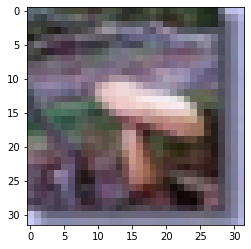

In [12]:
from PIL import Image 

img = x_test[3]
title = fine_labels[np.argmax(y_test[3])]

print(f'This is the {title} on the picture.')
plt.imshow(img) 

In [13]:
# добавление оси для совпадения формы входа модели; получается батч из одного примера
image = np.expand_dims(img, axis=0)

In [14]:
pred = model.predict(image)

print('Результат распознавания:')

for i, cl in enumerate(fine_labels):    
    # Вывод предсказания сети для каждого класса
    print('{:<14s}{:6.2%}'.format(cl, pred[0, i]))
print()

# Вычисление индекса класса с максимальным значением вероятности и вывод имени класса
cls_image = np.argmax(model.predict(image))
print('Изображен(а): ', fine_labels[cls_image])

Результат распознавания:
apple          0.00%
aquarium_fish  0.00%
baby           0.00%
bear           0.06%
beaver         0.02%
bed            0.00%
bee            0.00%
beetle         0.00%
bicycle        0.00%
bottle         0.00%
bowl           0.00%
boy            0.00%
bridge         0.00%
bus            0.00%
butterfly      0.00%
camel          0.12%
can            0.00%
castle         0.00%
caterpillar    0.00%
cattle         0.11%
chair          0.00%
chimpanzee     0.00%
clock          0.00%
cloud          0.00%
cockroach      0.00%
couch          0.00%
crab           0.00%
crocodile      0.00%
cup            0.00%
dinosaur       0.07%
dolphin        0.00%
elephant       0.18%
flatfish       0.00%
forest         0.00%
fox            0.01%
girl           0.00%
hamster        0.00%
house          0.00%
kangaroo       0.01%
keyboard       0.00%
lamp           0.01%
lawn_mower     0.00%
leopard        0.00%
lion           0.00%
lizard         0.00%
lobster        0.00%
man      

In [15]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(model_path='./cifar_model.h5', img_path='./1.jpg'):
     classes = {0: 'apple', 1: 'aquarium_fish', 2: 'baby',
     3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee',
     7: 'beetle',  8: 'bicycle', 9: 'bottle', 
     10: 'bowl', 11: 'boy', 12: 'bridge', 
     13: 'bus', 14: 'butterfly', 15: 'camel',
     16: 'can', 17: 'castle', 18: 'caterpillar',
     19: 'cattle', 20: 'chair', 21: 'chimpanzee', 
     22: 'clock', 23: 'cloud', 24: 'cockroach',
     25: 'couch', 26: 'crab', 27: 'crocodile', 
     28: 'cup', 29: 'dinosaur', 30: 'dolphin',
     31: 'elephant', 32: 'flatfish', 33: 'forest',
     34: 'fox', 35: 'girl', 36: 'hamster',
     37: 'house', 38: 'kangaroo', 39: 'keyboard',
     40: 'lamp', 41: 'lawn_mower', 42: 'leopard',
     43: 'lion', 44: 'lizard', 45: 'lobster',
     46: 'man', 47: 'maple_tree', 48: 'motorcycle',
     49: 'mountain', 50: 'mouse', 51: 'mushroom',
     52: 'oak_tree', 53: 'orange', 54: 'orchid',
     55: 'otter', 56: 'palm_tree', 57: 'pear',
     58: 'pickup_truck', 59: 'pine_tree',
     60: 'plain', 61: 'plate', 62: 'poppy',
     63: 'porcupine', 64: 'possum', 65: 'rabbit',
     66: 'raccoon', 67: 'ray', 68: 'road',
     69: 'rocket', 70: 'rose', 71: 'sea',
     72: 'seal', 73: 'shark', 74: 'shrew',
     75: 'skunk', 76: 'skyscraper', 77: 'snail',
     78: 'snake', 79: 'spider', 80: 'squirrel',
     81: 'streetcar', 82: 'sunflower', 
     83: 'sweet_pepper', 84: 'table', 85: 'tank',
     86: 'telephone', 87: 'television', 88: 'tiger',
     89: 'tractor', 90: 'train', 91: 'trout',
     92: 'tulip', 93: 'turtle', 94: 'wardrobe',
     95: 'whale', 96: 'willow_tree', 97: 'wolf',
     98: 'woman', 99: 'worm'}

     model = load_model(model_path)

     img_width, img_height = 32, 32
     img = Image.open(img_path).resize((img_height, img_width))
     image = np.array(img, dtype='float64') / 255

     image = np.expand_dims(image, axis=0)

     pred = model.predict(image)

     results = {}
     for i, cl in enumerate(fine_labels):    
     # Вывод предсказания сети для каждого класса
        results[cl] = pred[0, i]

     import pandas.io.formats.style

     df = pd.DataFrame({"label": results.keys(),
                        "%": results.values()}
                       ).sort_values('%', ascending=False)

     df = df.head(10).style.format({'%': "{:.2%}"})

     cls_image = np.argmax(model.predict(image))
     print(classes[cls_image])
     return(df, img)

In [18]:
predictions = predict(img_path='./9.jpg')

apple


In [19]:
predictions[0]

,label,%
0,apple,87.75%
57,pear,8.72%
83,sweet_pepper,1.78%
53,orange,1.69%
92,tulip,0.03%
10,bowl,0.02%
62,poppy,0.01%
7,beetle,0.00%
70,rose,0.00%
82,sunflower,0.00%


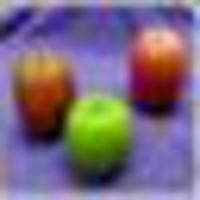

In [20]:
display(predictions[1].resize((200,200)))

In [28]:
# save to variable

text = """
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model

def predict(img_path='./test_image_1.jpg', model_path='./cifar_model.h5'):
     classes = {0: 'apple', 1: 'aquarium_fish', 2: 'baby',
     3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee',
     7: 'beetle',  8: 'bicycle', 9: 'bottle', 
     10: 'bowl', 11: 'boy', 12: 'bridge', 
     13: 'bus', 14: 'butterfly', 15: 'camel',
     16: 'can', 17: 'castle', 18: 'caterpillar',
     19: 'cattle', 20: 'chair', 21: 'chimpanzee', 
     22: 'clock', 23: 'cloud', 24: 'cockroach',
     25: 'couch', 26: 'crab', 27: 'crocodile', 
     28: 'cup', 29: 'dinosaur', 30: 'dolphin',
     31: 'elephant', 32: 'flatfish', 33: 'forest',
     34: 'fox', 35: 'girl', 36: 'hamster',
     37: 'house', 38: 'kangaroo', 39: 'keyboard',
     40: 'lamp', 41: 'lawn_mower', 42: 'leopard',
     43: 'lion', 44: 'lizard', 45: 'lobster',
     46: 'man', 47: 'maple_tree', 48: 'motorcycle',
     49: 'mountain', 50: 'mouse', 51: 'mushroom',
     52: 'oak_tree', 53: 'orange', 54: 'orchid',
     55: 'otter', 56: 'palm_tree', 57: 'pear',
     58: 'pickup_truck', 59: 'pine_tree',
     60: 'plain', 61: 'plate', 62: 'poppy',
     63: 'porcupine', 64: 'possum', 65: 'rabbit',
     66: 'raccoon', 67: 'ray', 68: 'road',
     69: 'rocket', 70: 'rose', 71: 'sea',
     72: 'seal', 73: 'shark', 74: 'shrew',
     75: 'skunk', 76: 'skyscraper', 77: 'snail',
     78: 'snake', 79: 'spider', 80: 'squirrel',
     81: 'streetcar', 82: 'sunflower', 
     83: 'sweet_pepper', 84: 'table', 85: 'tank',
     86: 'telephone', 87: 'television', 88: 'tiger',
     89: 'tractor', 90: 'train', 91: 'trout',
     92: 'tulip', 93: 'turtle', 94: 'wardrobe',
     95: 'whale', 96: 'willow_tree', 97: 'wolf',
     98: 'woman', 99: 'worm'}

     model = load_model(model_path)

     img_width, img_height = 32, 32
     img = Image.open(img_path).resize((img_height, img_width))
     image = np.array(img, dtype='float64') / 255

     image = np.expand_dims(image, axis=0)

     pred = model.predict(image)

     results = {}
     for i, cl in enumerate(fine_labels):    
     # Вывод предсказания сети для каждого класса
        results[cl] = pred[0, i]

     import pandas.io.formats.style

     df = pd.DataFrame({"label": results.keys(),
                        "%": results.values()}
                       ).sort_values('%', ascending=False)

     df = df.head(10).style.format({'%': "{:.2%}"})

     cls_image = np.argmax(model.predict(image))
     print(classes[cls_image])
     """

with open('script.py', 'w') as f:  # Создание / открытие файла 
    f.write(text)             # Запись в файл значения переменной text_code

In [29]:
label_txt = """
apple
aquarium_fish
baby
bear
beaver
bed
bee
beetle
bicycle
bottle
bowl
boy
bridge
bus
butterfly
camel
can
castle
caterpillar
cattle
chair
chimpanzee
clock
cloud
cockroach
couch
crab
crocodile
cup
dinosaur
dolphin
elephant
flatfish
forest
fox
girl
hamster
house
kangaroo
keyboard
lamp
lawn_mower
leopard
lion
lizard
lobster
man
maple_tree
motorcycle
mountain
mouse
mushroom
oak_tree
orange
orchid
otter
palm_tree
pear
pickup_truck
pine_tree
plain
plate 
poppy
porcupine
possum
rabbit
raccoon
ray
road
rocket
rose
sea
seal
shark
shrew
skunk
skyscraper
snail
snake
spider
squirrel
streetcar
sunflower
sweet_pepper
table
tank
telephone
television
tiger
tractor
train
trout
tulip
turtle
wardrobe
whale
willow_tree
wolf
woman
worm
"""

with open('label.txt', 'w') as f:  # Создание / открытие файла 
    f.write(label_txt.strip())     # Запись в файл значения переменной

In [30]:
for i in range(20):
   im = Image.fromarray((x_test[i] * 255).astype(np.uint8))
   im.save(f'{i}.jpg')

In [31]:
import os
from zipfile import ZipFile as Zip             # Модуль для работы с zip-архивами

# Список всех файлов
integrate_files = ['cifar_model.h5', 'script.py',
                   'label.txt', *[f'{i}.jpg' for i in range(1, 20)]]

zipArchive = Zip('/content/archive.zip', 'w')  # Открытие файла, если такого не существует - будет создан новый

for file in integrate_files:                   # Для всех всем нужных файлов:
    if os.path.exists(file):                   # Если файл существует,
        zipArchive.write(file)                 # то добавление его в архив
    else:
        print(f'Файл {file} отсутствует!')     # иначе вывод на экран названия отсутствующего файла

zipArchive.close()                             # В финале архив следует закрыть, как и обычный файл

In [60]:
from google.colab import files               # Функция для скачивания данных на локальный компьютер

files.download(filename='archive.zip')       # Скачивание готового архива

print('Архив загружен')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Архив загружен
